In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

In [25]:
# for a single degree of freedom
def euler_integrate(f, params, X0, time_span):
    # it is assummed that f (representing the acceleration function) is a function of x

    x0, v0 = X0

    # assume it is linearly spaced
    delta_t = time_span[1]-time_span[0]
    v = np.zeros(len(time_span))
    x = np.zeros(len(time_span))

    v[0] = v0
    x[0] = x0
    
    #print(a(3))
    for i in range(1, len(time_span)):
        # implicit integration generally yields better results
        v[i] = v[i-1] + delta_t*f(x[i-1], params)
        x[i] = x[i-1] + delta_t*v[i]

    return (x, v)
#def thing(x):
    #return x**x

#euler_integrate(thing, (1, 2), [0, 1, 2])


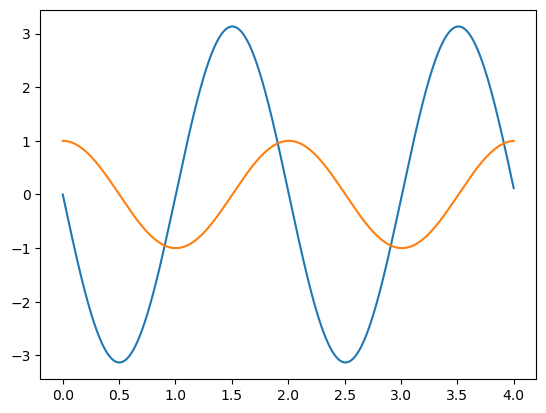

In [26]:
def f_sa(theta, params):
    g, l = params
    return -g/l*theta

g = 9.81 # m/s^2
l = 1 # m

# small angle (sa), initial conditions, theta then dot{theta}, rad and rad/s
X0_sa = (1., 0.)
params = (g, l)

t = np.linspace(0, 4, 10000)

theta_sa, dot_theta_sa = euler_integrate(f=f_sa, params=params, X0=X0_sa, time_span=t)

plt.plot(t, dot_theta_sa)
plt.plot(t, theta_sa)





# Doing it manually

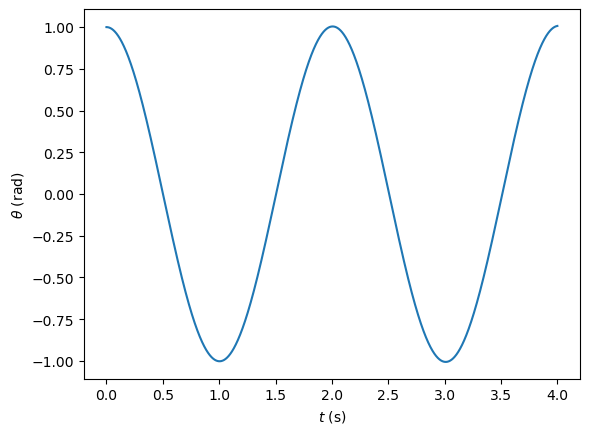

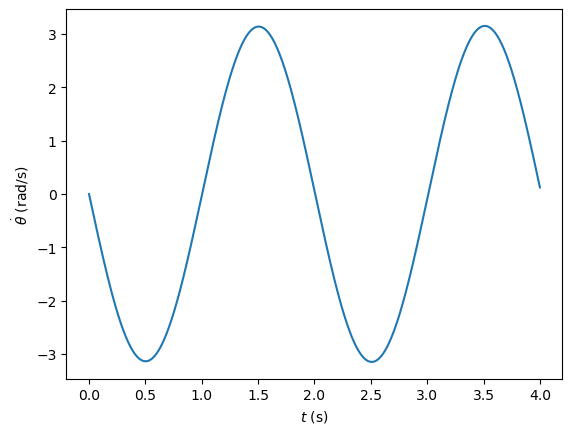

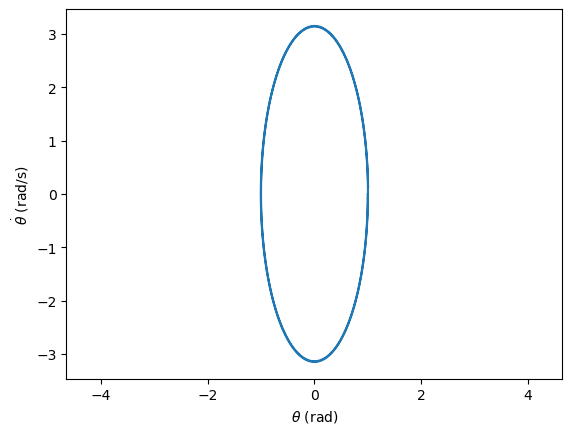

In [27]:
g = 9.81
l = 1
X0_small = (1., 0)

t = np.linspace(0, 4, 10000)
delta_t = (t[-1]-t[0])/len(t)

theta_small_approx = np.zeros(len(t))
omega_small_approx = np.zeros(len(t))

theta_small_approx[0] = X0_small[0]
omega_small_approx[0] = X0_small[1]

for i in range(len(t)-1):
    omega_small_approx[i+1] = omega_small_approx[i] - g/l*theta_small_approx[i]*delta_t
    theta_small_approx[i+1] = theta_small_approx[i] + omega_small_approx[i]*delta_t


plt.plot(t, theta_small_approx)
plt.ylabel(r"$\theta$ (rad)")
plt.xlabel("$t$ (s)")
plt.show()


plt.plot(t, omega_small_approx)
plt.ylabel(r"$\dot{\theta}$ (rad/s)")
plt.xlabel("$t$ (s)")
plt.show()


plt.axis("equal") # won't work
plt.plot(theta_small_approx, omega_small_approx)
plt.ylabel(r"$\dot{\theta}$ (rad/s)")
plt.xlabel(r"$\theta$ (rad)")


#plt.xlim(-1, 1)
#plt.ylim(-3, 3)
plt.show()

## Compare with exact

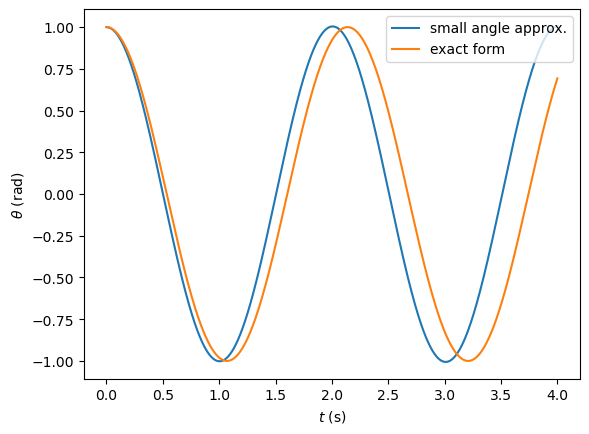

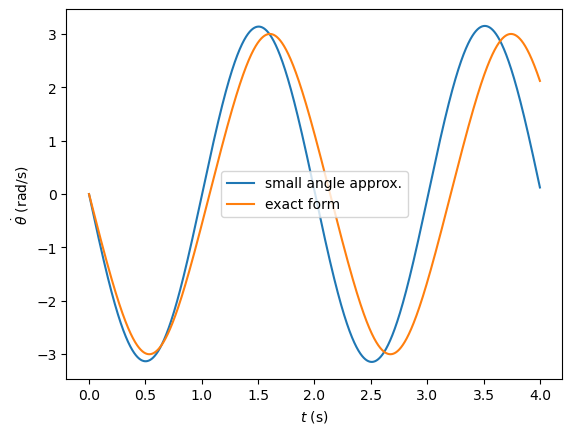

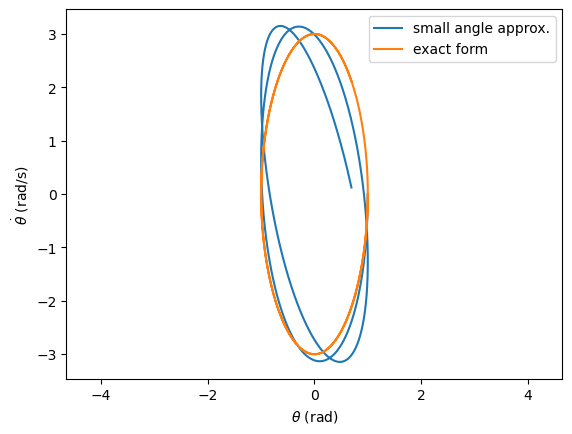

In [28]:
def f_exact(theta, params):
    g, l = params
    return -g/l*np.sin(theta)

params = (g, l)
theta_small, omega_small = euler_integrate(f=f_exact, params=params, X0=X0_small, time_span=t)

plt.plot(t, theta_small_approx, label=r"small angle approx.")
plt.plot(t, theta_small, label=r"exact form")
plt.ylabel(r"$\theta$ (rad)")
plt.xlabel("$t$ (s)")
plt.legend()

plt.show()


plt.plot(t, omega_small_approx, label=r"small angle approx.")
plt.plot(t, omega_small, label=r"exact form")
plt.ylabel(r"$\dot{\theta}$ (rad/s)")
plt.xlabel("$t$ (s)")
plt.legend()

plt.show()


plt.plot(theta_small, omega_small_approx, label=r"small angle approx.")
plt.plot(theta_small, omega_small, label=r"exact form")
plt.ylabel(r"$\dot{\theta}$ (rad/s)")
plt.xlabel(r"$\theta$ (rad)")
plt.legend()

plt.axis('equal')


#plt.xlim(-1, 1)
#plt.ylim(-3, 3)
plt.show()

## Large angle

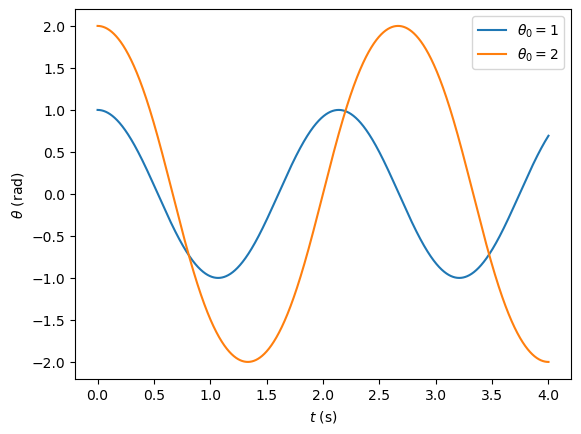

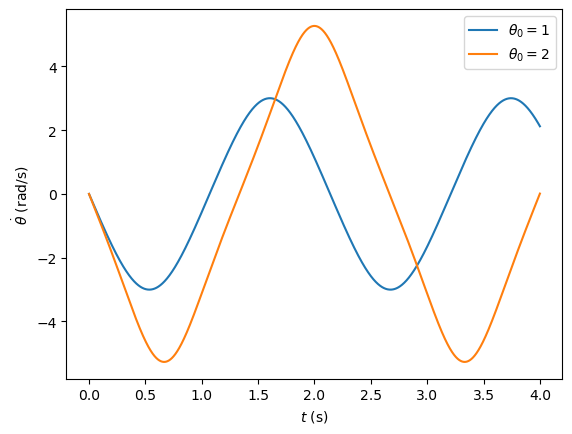

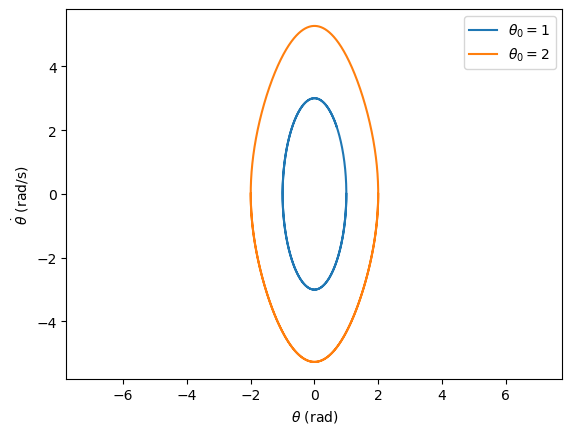

In [29]:


params = (g, l)
X0_large = (2, 0)



theta_large, omega_large = euler_integrate(f=f_exact, params=params, X0=X0_large, time_span=t)

plt.plot(t, theta_small, label=r"$\theta_0 = 1$")
plt.plot(t, theta_large, label=r"$\theta_0 = 2$")
plt.ylabel(r"$\theta$ (rad)")
plt.xlabel("$t$ (s)")
plt.legend()

plt.show()


plt.plot(t, omega_small, label=r"$\theta_0 = 1$")
plt.plot(t, omega_large, label=r"$\theta_0 = 2$")
plt.ylabel(r"$\dot{\theta}$ (rad/s)")
plt.xlabel("$t$ (s)")
plt.legend()

plt.show()


plt.plot(theta_small, omega_small, label=r"$\theta_0 = 1$")
plt.plot(theta_large, omega_large, label=r"$\theta_0 = 2$")
plt.ylabel(r"$\dot{\theta}$ (rad/s)")
plt.xlabel(r"$\theta$ (rad)")
plt.legend()

plt.axis('equal')


#plt.xlim(-1, 1)
#plt.ylim(-3, 3)
plt.show()


## Very large angle

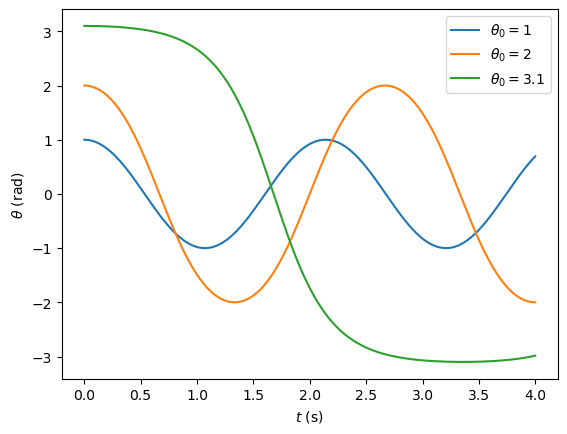

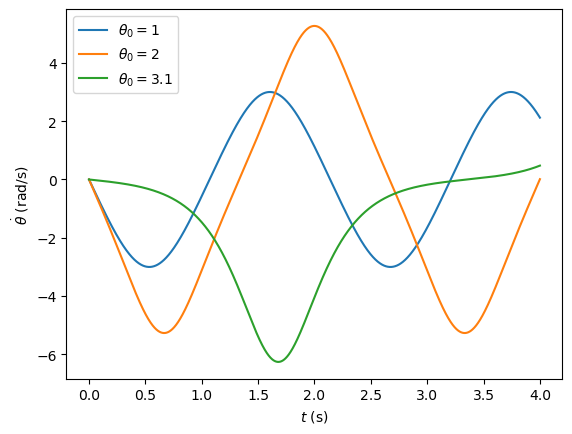

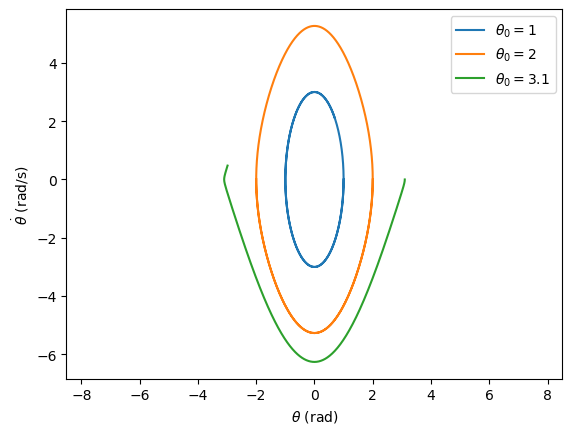

In [30]:
params = (g, l)
X0_vlarge = (3.1, 0)


theta_vlarge, omega_vlarge = euler_integrate(f=f_exact, params=params, X0=X0_vlarge, time_span=t)

plt.plot(t, theta_small, label=r"$\theta_0 = 1$")
plt.plot(t, theta_large, label=r"$\theta_0 = 2$")
plt.plot(t, theta_vlarge, label=r"$\theta_0 = 3.1$")
plt.ylabel(r"$\theta$ (rad)")
plt.xlabel("$t$ (s)")
plt.legend()

plt.show()


plt.plot(t, omega_small, label=r"$\theta_0 = 1$")
plt.plot(t, omega_large, label=r"$\theta_0 = 2$")
plt.plot(t, omega_vlarge, label=r"$\theta_0 = 3.1$")
plt.ylabel(r"$\dot{\theta}$ (rad/s)")
plt.xlabel("$t$ (s)")
plt.legend()

plt.show()


plt.plot(theta_small, omega_small, label=r"$\theta_0 = 1$")
plt.plot(theta_large, omega_large, label=r"$\theta_0 = 2$")
plt.plot(theta_vlarge, omega_vlarge, label=r"$\theta_0 = 3.1$")
plt.ylabel(r"$\dot{\theta}$ (rad/s)")
plt.xlabel(r"$\theta$ (rad)")
plt.legend()

plt.axis('equal')


#plt.xlim(-1, 1)
#plt.ylim(-3, 3)
plt.show()


find the period

In [49]:
# method that tried to find T such that x(0) = x(T) + error. Not effective at all
def find_period(x, t, error):
    x0 = x[0]
    k = 0
    print(f"x0 = {x0}")
    for i in range(1, len(x)):
        print(f"x[{i}] = {x[i]}")
        if (x[i] == x0 + error) or (x[i] == x0 - error) :
            k = i
            break

    T = t[k]-t[0]
    return T

# find zeros of the velocity
def find_period2(v, t, error):
    for i in range(len(v)):
        if (v[i] > 0 and v[i] < 0 + error) or (v[i] < 0 and v[i] == 0 - error):
            print(i)


find_period2(omega_small, t, error=1e-5)
#T_small = find_period(theta_small, t, error=1e-10)
#print(f"Period for small angle oscillations, T = {T_small}")


## Energies

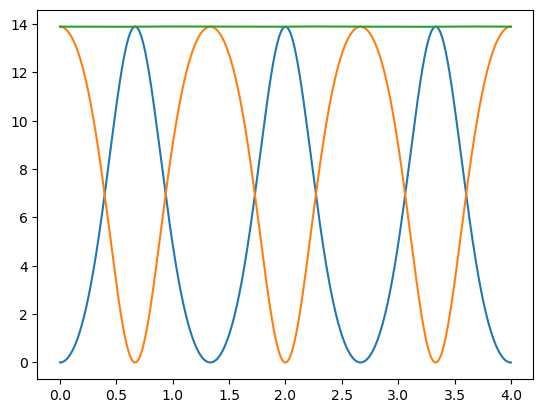

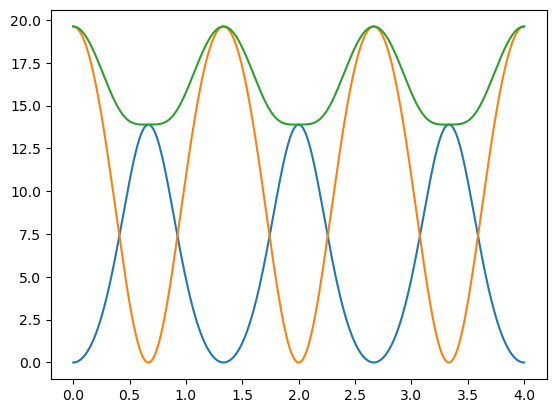

In [51]:
# for the theta0 = 2 rad case, for unit mass

Ec_large = 0.5*(l*omega_large)**2
Ep_large = g*l*(1-np.cos(theta_large))
Ep_large_taylor = 0.5*g*l*theta_large**2

plt.plot(t, Ec_large)
plt.plot(t, Ep_large)
plt.plot(t, Ec_large+Ep_large)
plt.show()

plt.plot(t, Ec_large)
plt.plot(t, Ep_large_taylor)
plt.plot(t, Ec_large+Ep_large_taylor)